In [133]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [134]:
# Reading from a csv file, into a data frame
dfB = pd.read_csv('smithfieldBikesWeather.csv')
dfB.shape

(6297, 30)

In [135]:
#extract what we need
dfS=dfB[["dateTime","stationName","Day","hour","weatherMain","temperature","stationBikesAvailable"]]
dfS.head()

,dateTime,stationName,Day,hour,weatherMain,temperature,stationBikesAvailable
0,18/02/2019 20:36,SMITHFIELD,Monday,20,Clouds,7,8
1,18/02/2019 20:38,SMITHFIELD,Monday,20,Clouds,7,8
2,18/02/2019 20:43,SMITHFIELD,Monday,20,Clouds,7,12
3,18/02/2019 20:44,SMITHFIELD,Monday,20,Clouds,7,12
4,19/02/2019 09:11,SMITHFIELD,Tuesday,9,Clouds,6,0


In [137]:
dfS.dtypes

dateTime                 object
stationName              object
Day                      object
hour                      int64
weatherMain              object
temperature               int64
stationBikesAvailable     int64
dtype: object

In [138]:
#prevent pandas error when changing to datatype
pd.options.mode.chained_assignment = None

In [139]:
dfS['dateTime'] =  pd.to_datetime(dfS['dateTime'], format='%d/%m/%Y %H:%M')
dfS.dtypes

dateTime                 datetime64[ns]
stationName                      object
Day                              object
hour                              int64
weatherMain                      object
temperature                       int64
stationBikesAvailable             int64
dtype: object

In [140]:
#take only the first week of data to train the model
dfS = dfS.loc[dfS['dateTime'] < '2019/02/26']
dfS

,dateTime,stationName,Day,hour,weatherMain,temperature,stationBikesAvailable
0,2019-02-18 20:36:00,SMITHFIELD,Monday,20,Clouds,7,8
1,2019-02-18 20:38:00,SMITHFIELD,Monday,20,Clouds,7,8
2,2019-02-18 20:43:00,SMITHFIELD,Monday,20,Clouds,7,12
3,2019-02-18 20:44:00,SMITHFIELD,Monday,20,Clouds,7,12
4,2019-02-19 09:11:00,SMITHFIELD,Tuesday,9,Clouds,6,0
5,2019-02-19 09:45:00,SMITHFIELD,Tuesday,9,Clouds,6,0
6,2019-02-19 09:46:00,SMITHFIELD,Tuesday,9,Clouds,6,0
7,2019-02-19 09:47:00,SMITHFIELD,Tuesday,9,Clouds,6,1
8,2019-02-19 09:48:00,SMITHFIELD,Tuesday,9,Clouds,6,1
9,2019-02-19 09:54:00,SMITHFIELD,Tuesday,9,Clouds,6,1


<Figure size 432x288 with 0 Axes>

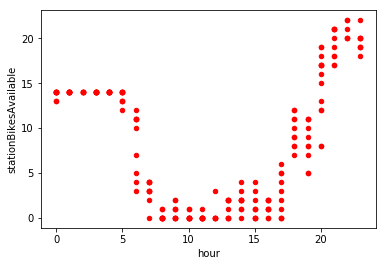

In [141]:
plt.figure()
dfS.loc[dfS['Day']=='Monday'].plot(kind='scatter', x='hour', y='stationBikesAvailable', color='r')    

# Linear Regression using 1 feature (hour)

In [142]:
# Prepare the descriptive features
cont_features = ['hour']

x = dfS[cont_features]
y = dfS.stationBikesAvailable

Theory

Polynomial regression is a special case of linear regression. With the main idea of how do you select your features. Looking at the multivariate regression with 2 variables: x1 and x2. Linear regression will look like this: y = a1 * x1 + a2 * x2.

Now you want to have a polynomial regression (let's make 2 degree polynomial). We will create a few additional features: x1*x2, x1^2 and x2^2. So we will get your 'linear regression':

y = a1 * x1 + a2 * x2 + a3 * x1*x2 + a4 * x1^2 + a5 * x2^2
This nicely shows an important concept curse of dimensionality, because the number of new features grows much faster than linearly with the growth of degree of polynomial. You can take a look about this concept here.

Practice with scikit-learn

You do not need to do all this in scikit. Polynomial regression is already available there (in 0.15 version. Check how to update it here).


In [143]:
# Train aka fit, a model using  continuous features.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2)

p = poly.fit_transform(x)
print ('fitted data: \n', p)
print("Features: ", cont_features)
print("Coeficients of polynomial: \n", poly.get_feature_names())


fitted data: 
 [[  1.  20. 400.]
 [  1.  20. 400.]
 [  1.  20. 400.]
 ...
 [  1.  23. 529.]
 [  1.  23. 529.]
 [  1.  23. 529.]]
Features:  ['hour']
Coeficients of polynomial: 
 ['1', 'x0', 'x0^2']


## Linear Regression using multiple feature 
need to convert categorical into numerical, I use integer encodig

we have 7 weatherMain so number 1 to 7
we have 7 days so number 1 to 7

In [145]:
dfS['Day'] = dfS['Day'].replace(['Monday'], 1)
dfS['Day'] = dfS['Day'].replace(['Tuesday'], 2)
dfS['Day'] = dfS['Day'].replace(['Wednesday'], 3)
dfS['Day'] = dfS['Day'].replace(['Thursday'], 4)
dfS['Day'] = dfS['Day'].replace(['Friday'], 5)
dfS['Day'] = dfS['Day'].replace(['Saturday'], 6)
dfS['Day'] = dfS['Day'].replace(['Sunday'], 7)

#

dfS['weatherMain'] = dfS['weatherMain'].replace(['Clear'], 1)
dfS['weatherMain'] = dfS['weatherMain'].replace(['Clouds'], 2)
dfS['weatherMain'] = dfS['weatherMain'].replace(['Drizzle'], 3)
dfS['weatherMain'] = dfS['weatherMain'].replace(['Fog'], 4)
dfS['weatherMain'] = dfS['weatherMain'].replace(['Mist'], 5)
dfS['weatherMain'] = dfS['weatherMain'].replace(['Rain'], 6)
dfS['weatherMain'] = dfS['weatherMain'].replace(['Snow'], 7)


In [146]:
features = ["Day","hour","weatherMain","temperature"]

#input values
x = dfS[features]
#target values
y = dfS.stationBikesAvailable

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
#train model 
model.fit(x_poly, y)

#predict using same input
y_poly_pred = model.predict(x_poly)

print ('fitted data: \n', x_poly)
print("Features: ", features)
print("Coeficients of polynomial: \n", polynomial_features.get_feature_names())


fitted data: 
 [[ 1.  1. 20. ...  4. 14. 49.]
 [ 1.  1. 20. ...  4. 14. 49.]
 [ 1.  1. 20. ...  4. 14. 49.]
 ...
 [ 1.  1. 23. ...  4. 10. 25.]
 [ 1.  1. 23. ...  4. 12. 36.]
 [ 1.  1. 23. ...  4. 12. 36.]]
Features:  ['Day', 'hour', 'weatherMain', 'temperature']
Coeficients of polynomial: 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']


### Testing the model
Using the trained model to predict the target feature availbikes on the same dataset

In [147]:
print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y, pd.DataFrame(y_poly_pred, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg)


Predictions with multiple linear regression: 

      stationBikesAvailable  Predicted
0                         8  11.716590
1                         8  11.716590
2                        12  11.716590
3                        12  11.716590
4                         0   5.539093
5                         0   5.539093
6                         0   5.539093
7                         1   5.539093
8                         1   5.539093
9                         1   5.539093
10                        1   5.349960
11                        1   5.349960
12                        1   5.175591
13                        1   5.175591
14                        0   5.175591
15                        0   5.175591
16                        0   5.175591
17                        1   5.045768
18                        1   5.045768
19                        1   5.045768
20                        1   5.045768
21                        1   4.919945
22                        1   4.919945
23              

### Testing the model on a different dataset

In [148]:
dfTest=dfB[["dateTime","stationName","Day","hour","weatherMain","temperature","stationBikesAvailable"]]
dfTest['dateTime'] =  pd.to_datetime(dfTest['dateTime'], format='%d/%m/%Y %H:%M')

In [149]:
#take only the first week of data to train the model
dfTest = dfTest.loc[(dfTest['dateTime'] > '2019/02/26') & (dfTest['dateTime'] < '2019/03/06')]

In [150]:
dfTest['Day'] = dfTest['Day'].replace(['Monday'], 1)
dfTest['Day'] = dfTest['Day'].replace(['Tuesday'], 2)
dfTest['Day'] = dfTest['Day'].replace(['Wednesday'], 3)
dfTest['Day'] = dfTest['Day'].replace(['Thursday'], 4)
dfTest['Day'] = dfTest['Day'].replace(['Friday'], 5)
dfTest['Day'] = dfTest['Day'].replace(['Saturday'], 6)
dfTest['Day'] = dfTest['Day'].replace(['Sunday'], 7)

#

dfTest['weatherMain'] = dfTest['weatherMain'].replace(['Clear'], 1)
dfTest['weatherMain'] = dfTest['weatherMain'].replace(['Clouds'], 2)
dfTest['weatherMain'] = dfTest['weatherMain'].replace(['Drizzle'], 3)
dfTest['weatherMain'] = dfTest['weatherMain'].replace(['Fog'], 4)
dfTest['weatherMain'] = dfTest['weatherMain'].replace(['Mist'], 5)
dfTest['weatherMain'] = dfTest['weatherMain'].replace(['Rain'], 6)
dfTest['weatherMain'] = dfTest['weatherMain'].replace(['Snow'], 7)


In [152]:
dfTest[features].head()

,Day,hour,weatherMain,temperature
1550,2,0,2,6
1551,2,0,2,6
1552,2,0,2,6
1553,2,0,2,6
1554,2,0,2,6


In [131]:
features = ["Day","hour","weatherMain","temperature"]

#input to predict
predict = dfTest[features]
#target output
y = dfTest.stationBikesAvailable

#use polynomial features to fit the new values
prediction = polynomial_features.fit_transform(predict)

#predict using model trained
new_pred = model.predict(prediction).round(3)
new_pred

array([16.391, 16.391, 16.391, ..., 14.865, 14.865, 14.865])

In [132]:
print("\nPredictions with multiple linear regression: \n")

#concat doesn't work because the indexes are different so I used a loop

print ('availBikes     prediction')
for k,v in enumerate(y):
    for y,z in enumerate (new_pred):
        if k == y:
            print (v , '\t\t' , z)
        


Predictions with multiple linear regression: 

availBikes     prediction
20 		 16.391
20 		 16.391
20 		 16.391
20 		 16.391
20 		 16.391
20 		 11.667
20 		 11.667
20 		 11.667
20 		 11.667
20 		 10.264
20 		 10.264
20 		 10.264
20 		 10.264
20 		 10.264
20 		 10.264
20 		 9.065
20 		 9.065
20 		 9.065
20 		 9.065
20 		 9.065
20 		 8.997
20 		 8.997
20 		 8.997
20 		 8.997
20 		 8.072
20 		 8.072
20 		 8.072
20 		 8.072
19 		 8.072
18 		 8.072
18 		 8.072
18 		 8.072
17 		 8.072
17 		 8.072
16 		 7.349
16 		 7.349
16 		 7.349
14 		 7.349
11 		 7.349
9 		 7.349
0 		 6.83
0 		 6.83
3 		 6.83
3 		 6.83
2 		 6.83
2 		 6.83
2 		 6.83
1 		 6.83
2 		 6.83
2 		 6.83
2 		 6.514
0 		 6.514
4 		 6.514
2 		 6.514
1 		 6.514
0 		 6.134
2 		 5.881
3 		 5.881
1 		 5.881
4 		 5.688
2 		 5.539
0 		 5.539
0 		 5.435
0 		 5.435
0 		 5.435
0 		 5.435
1 		 5.176
1 		 5.046
0 		 5.046
1 		 4.96
1 		 4.96
2 		 4.96
0 		 4.92
0 		 4.92
1 		 4.92
0 		 4.92
0 		 4.654
0 		 4.588
0 		 4.588
0 		 4.588
0 		 4.56

3 		 25.024
3 		 23.299
3 		 23.299
3 		 23.299
3 		 23.299
3 		 23.299
3 		 23.299
3 		 23.299
3 		 23.299
3 		 23.299
3 		 23.299
3 		 21.779
3 		 21.779
3 		 21.779
3 		 21.779
3 		 21.779
3 		 21.779
3 		 21.779
3 		 21.779
3 		 21.779
3 		 21.779
3 		 20.461
3 		 20.461
3 		 20.461
3 		 20.461
3 		 20.461
3 		 20.461
3 		 20.461
3 		 20.461
2 		 20.461
3 		 20.461
5 		 19.347
5 		 19.347
6 		 19.347
6 		 19.347
7 		 19.347
7 		 19.347
7 		 10.542
7 		 10.542
7 		 10.542
7 		 10.542
8 		 9.882
8 		 9.882
9 		 9.882
9 		 9.882
8 		 9.882
8 		 9.882
8 		 9.882
8 		 9.882
7 		 9.882
7 		 9.882
7 		 9.424
8 		 9.424
8 		 9.424
8 		 9.424
8 		 9.424
7 		 17.728
7 		 17.728
7 		 17.728
7 		 17.728
7 		 17.728
7 		 17.224
8 		 17.224
8 		 17.224
8 		 17.224
9 		 17.224
9 		 17.224
9 		 18.748
9 		 18.748
9 		 18.748
9 		 18.748
8 		 18.517
8 		 18.517
8 		 18.517
7 		 18.517
7 		 18.517
7 		 18.517
6 		 18.517
5 		 18.517
5 		 18.517
4 		 20.156
4 		 20.199
4 		 20.199
5 		 20.199
4 		 20